<a href="https://colab.research.google.com/github/Surya9835/Internship/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
display(df.shape)
display(df.size)

(918, 12)

11016

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

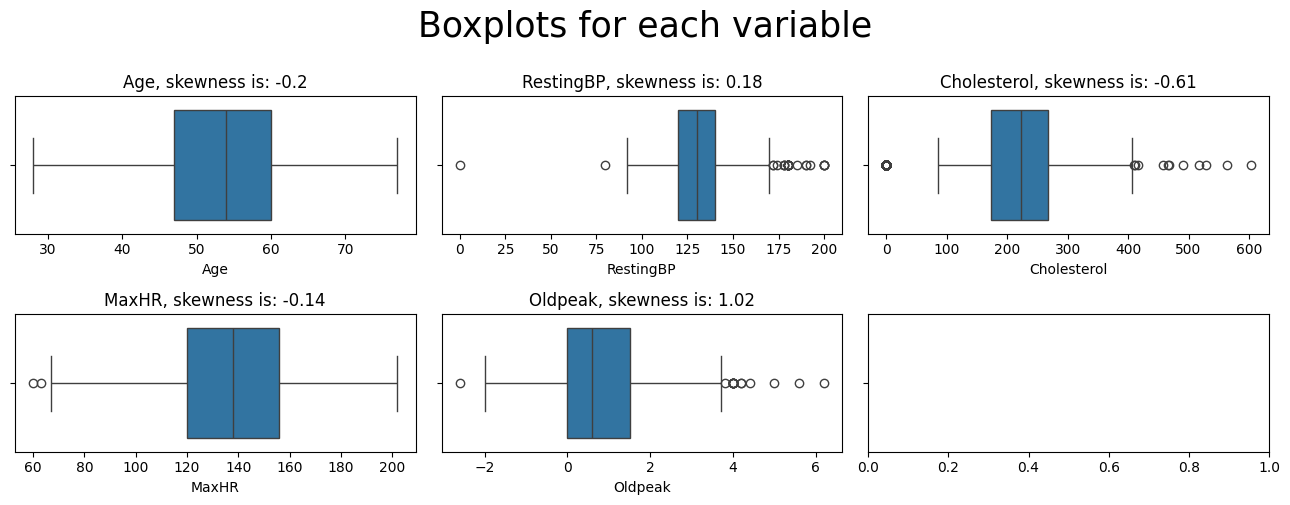

In [11]:
numerical_columns = list(df.loc[:,['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
categorical_columns = list(df.loc[:,['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

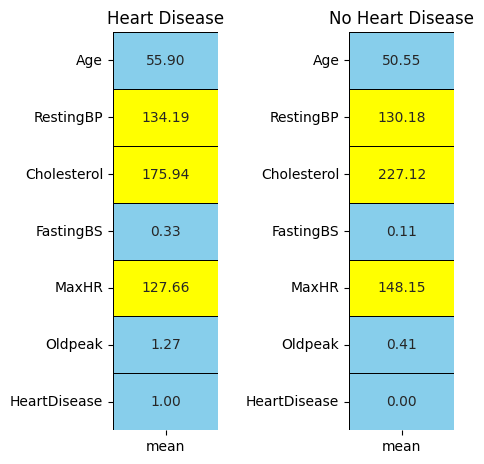

In [12]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['skyblue','yellow']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [13]:
px.violin(df,x='ST_Slope',y='MaxHR',color='ST_Slope',labels={'MaxHR':'HeartRate'},template='plotly_dark',title='ST_Slope Vs HeartRate')

In [14]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


<Axes: >

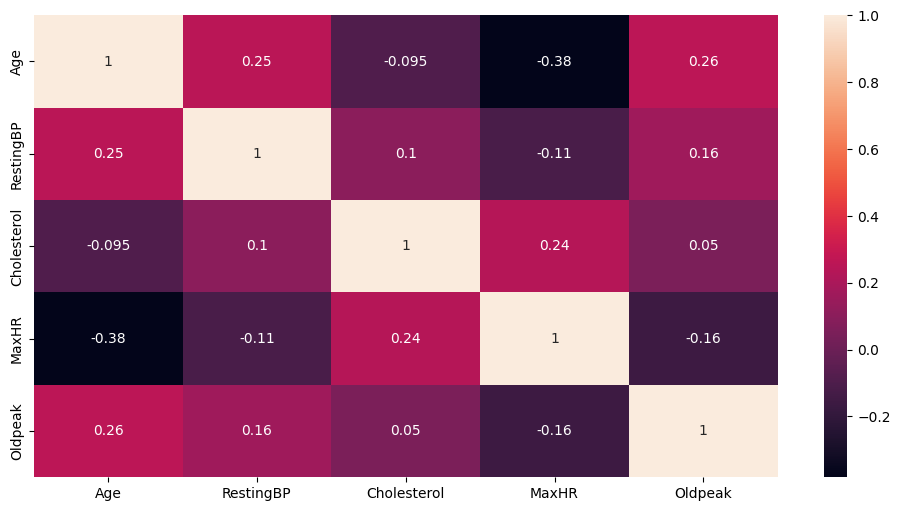

In [15]:
numerical_features_df = pd.DataFrame(df[numerical_features])
plt.figure(figsize=(12,6))
sns.heatmap(numerical_features_df.corr(),annot=True)


In [16]:
labels=["Healthy","Heart Disease"]

healthy_or_not = df['HeartDisease'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=df['HeartDisease'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","gray"]
             ,title="Healthy vs Heart Disease")
fig.show()


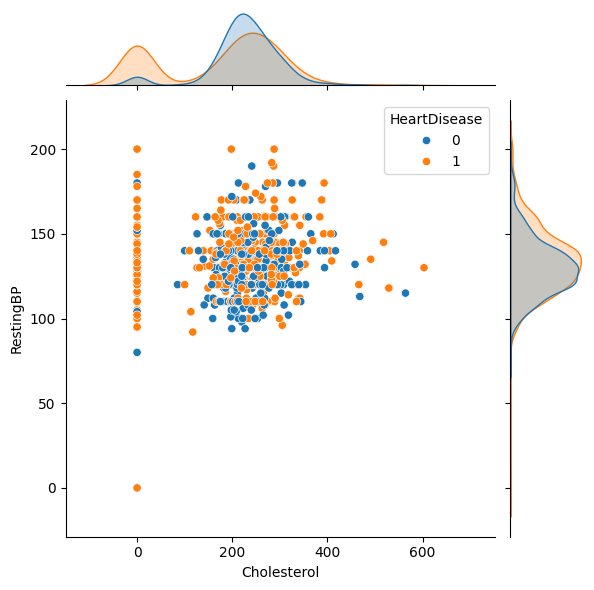

In [17]:
sns.jointplot(data=df, x="Cholesterol", y="RestingBP", hue="HeartDisease");

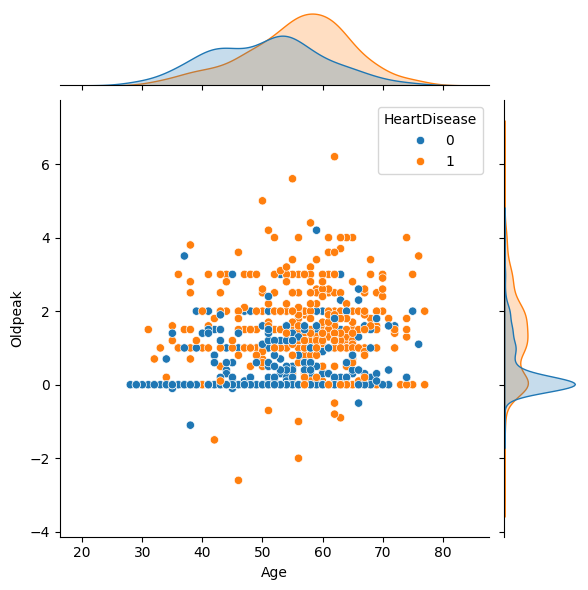

In [18]:
sns.jointplot(data=df, x="Age", y="Oldpeak", hue="HeartDisease");

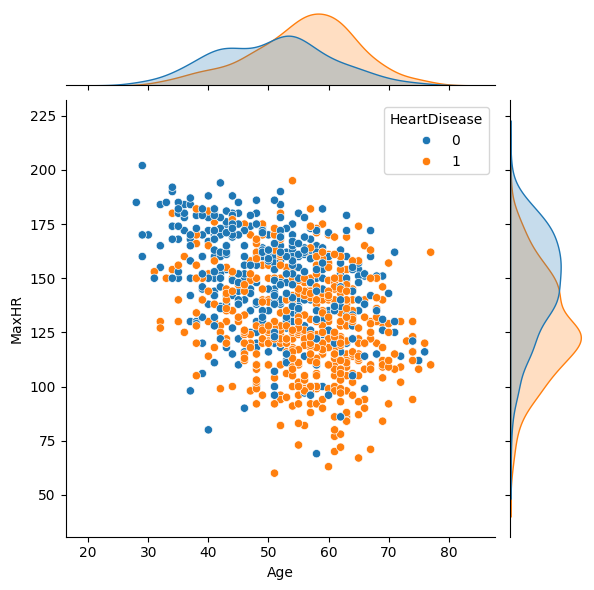

In [19]:
#Age RestingBP Cholesterol MaxHR Oldpeak
sns.jointplot(data=df, x="Age", y="MaxHR", hue="HeartDisease");

In [21]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_invariant=True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

ModuleNotFoundError: No module named 'category_encoders'

In [23]:

pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [24]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_invariant=True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


<Axes: >

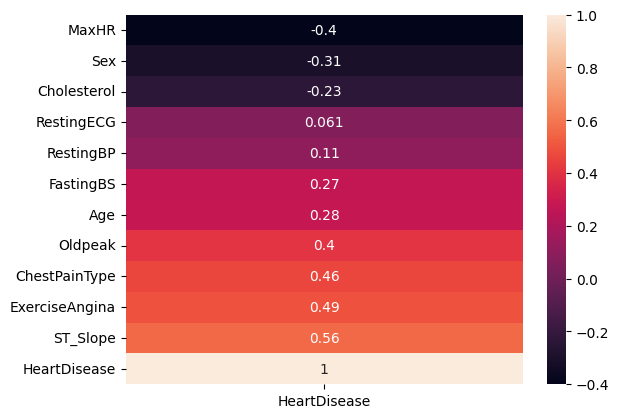

In [25]:
corr = df_encoded.corr()
corr_heart = corr['HeartDisease'].sort_values().to_frame()
sns.heatmap(corr_heart, annot = True)

Chi squared Test

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy as sp

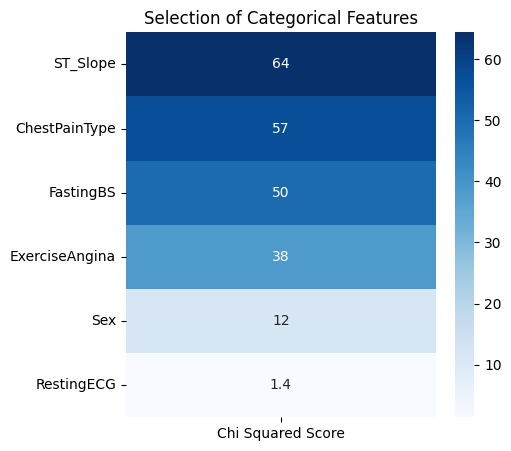

In [27]:
features = df_encoded.loc[:,categorical_features[:-1]]
target = df_encoded.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])
critical_value = sp.stats.chi2.ppf(.10, 6)

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True, cmap = 'Blues');
plt.title('Selection of Categorical Features');

In [28]:
critical_value

2.2041306564986427

Critical value at 10% significance is 2.2, Hence we will drop RestingECG

ANOVA Test

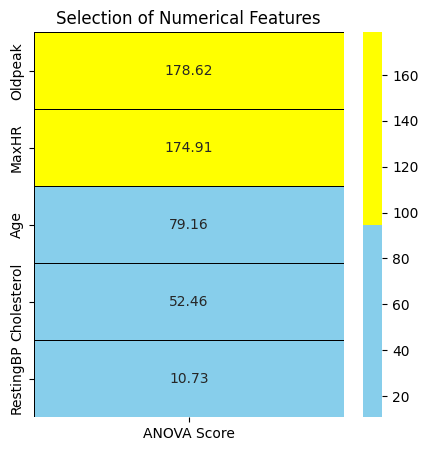

In [29]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features = df_encoded.loc[:,numerical_features]
columns = features.columns
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns = columns)


target = df_encoded.loc[:,'HeartDisease']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score')
            , annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f');
plt.title('Selection of Numerical Features');

we'll drop RestingBP as it has a low score


In [30]:
X = df_encoded.drop(['HeartDisease', 'RestingBP', 'RestingECG'],axis=1)
y = df_encoded['HeartDisease']

In [31]:
from sklearn.preprocessing import MinMaxScaler

Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
column = X.columns
X_train.columns, X_test.columns = column, column

Feature Scaling

In [34]:
column = X.columns
X_train.columns, X_test.columns = column, column

In [35]:
# scaling dataset with robust scaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
display(X_train.shape,
       X_test.shape)

(734, 9)

(184, 9)

Model Building

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, accuracy_score, RocCurveDisplay, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

In [38]:
def model_fitandevaluate(model, X_train, y_train, X_test, y_test):
    def model_fit(model, X_train, y_train, X_test):
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        pred_prob = model.predict_proba(X_test)[:,1]
        return prediction, pred_prob

    def model_evaluate(model, X_train, y_train, X_test, y_test):
        prediction, pred_prob = model_fit(model, X_train, y_train, X_test)
        print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
        print("Recall : ",'{0:.2%}'.format(recall_score(y_test,prediction)))
        print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,pred_prob)))
        RocCurveDisplay.from_predictions(y_test, pred_prob)
        plt.title('ROC_AUC_Plot')
        plt.show()

    return model_evaluate(model, X_train, y_train, X_test, y_test)


In [39]:
def model_fitandfinetune(model, X_train, y_train, X_test, y_test):
    def model_fit(model, X_train, y_train, X_test):
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        pred_prob = model.predict_proba(X_test)[:,1]
        return prediction, pred_prob

    def model_evaluate(model, X_train, y_train, X_test, y_test):
        prediction, pred_prob = model_fit(model, X_train, y_train, X_test)
        return roc_auc_score(y_test,pred_prob), accuracy_score(y_test,prediction)

    return model_evaluate(model, X_train, y_train, X_test, y_test)


1.Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

Accuracy :  83.70%
Recall :  88.35%
ROC_AUC Score :  90.55%


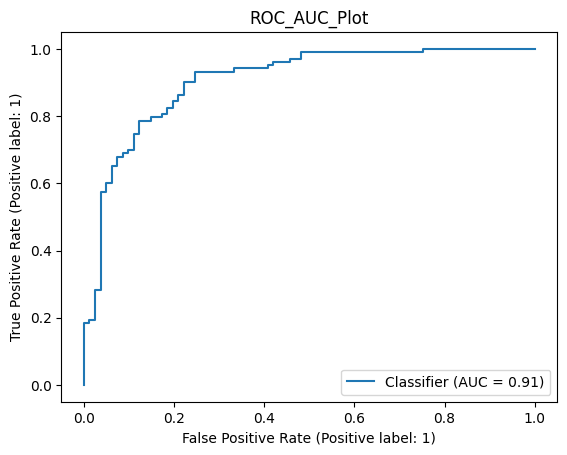

In [41]:
classifier_lr = LogisticRegression()
model_fitandevaluate(classifier_lr, X_train, y_train, X_test, y_test)

In [42]:
params = {
    'penalty' : ['l2'],
    'C' : [i for i in range(5,40,5)]

}

grid_lr = GridSearchCV(classifier_lr, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [43]:
para = grid_lr.best_params_
print('Best parameters:', grid_lr.best_params_)
print('Best score:', grid_lr.best_score_)

Best parameters: {'C': 5, 'penalty': 'l2'}
Best score: 0.8765926877708397


Accuracy :  83.70%
Recall :  88.35%
ROC_AUC Score :  90.84%


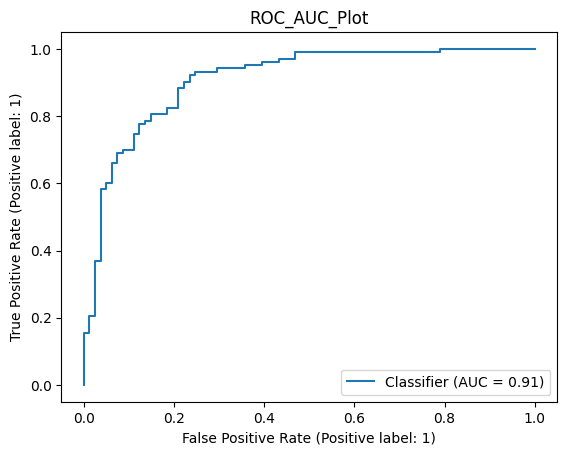

In [44]:
classifier_lr = LogisticRegression(**para)
model_fitandevaluate(classifier_lr, X_train, y_train, X_test, y_test)

2.SVC

In [46]:
from sklearn.svm import SVC

Accuracy :  83.70%
Recall :  90.29%
ROC_AUC Score :  88.07%


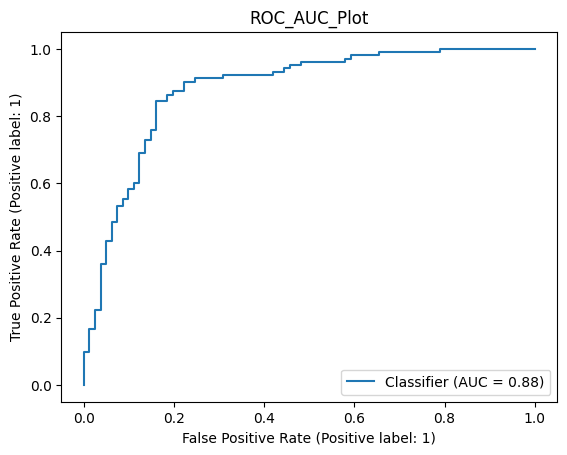

In [47]:
classifier_svc = SVC(probability=True)
model_fitandevaluate(classifier_svc, X_train, y_train, X_test, y_test)

In [48]:
params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight' : [None, 'balanced']

}

grid_svc = GridSearchCV(classifier_svc, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [49]:
para = grid_svc.best_params_
print('Best parameters:', grid_svc.best_params_)
print('Best score:', grid_svc.best_score_)

Best parameters: {'class_weight': None, 'kernel': 'rbf'}
Best score: 0.9191280972608284


Accuracy :  83.70%
Recall :  90.29%
ROC_AUC Score :  88.07%


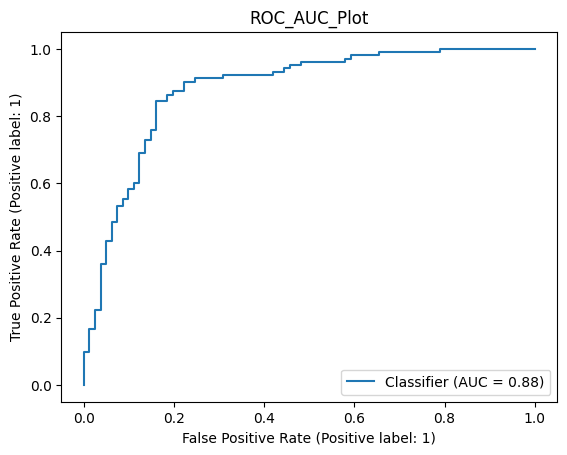

In [50]:
classifier_svc = SVC(probability=True,**para) #all the default values are optimal
model_fitandevaluate(classifier_svc, X_train, y_train, X_test, y_test)

Accuracy :  83.70%
Recall :  90.29%
ROC_AUC Score :  88.07%


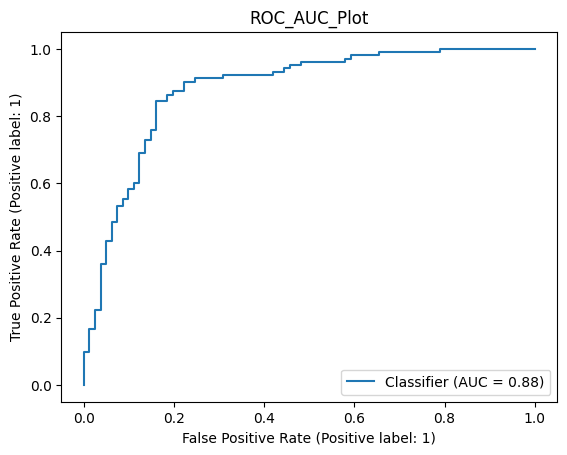

In [51]:
classifier_svc = SVC(probability=True)
model_fitandevaluate(classifier_svc, X_train, y_train, X_test, y_test)

3.Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

Accuracy :  76.09%
Recall :  74.76%
ROC_AUC Score :  76.27%


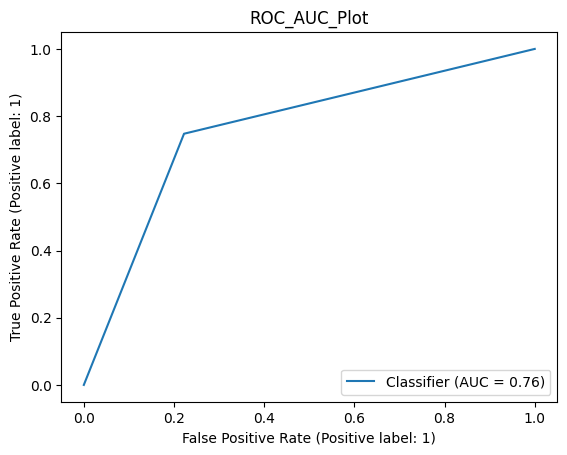

In [53]:
classifier_dt = DecisionTreeClassifier()
model_fitandevaluate(classifier_dt, X_train, y_train, X_test, y_test)

In [54]:
params = {
    'max_depth' : [i for i in range(1, 10)]
}

grid_dt = GridSearchCV(classifier_dt, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [55]:
para = grid_dt.best_params_
print('Best parameters:', grid_dt.best_params_)
print('Best score:', grid_dt.best_score_)

Best parameters: {'max_depth': 4}
Best score: 0.88078763421064


Accuracy :  83.15%
Recall :  88.35%
ROC_AUC Score :  87.07%


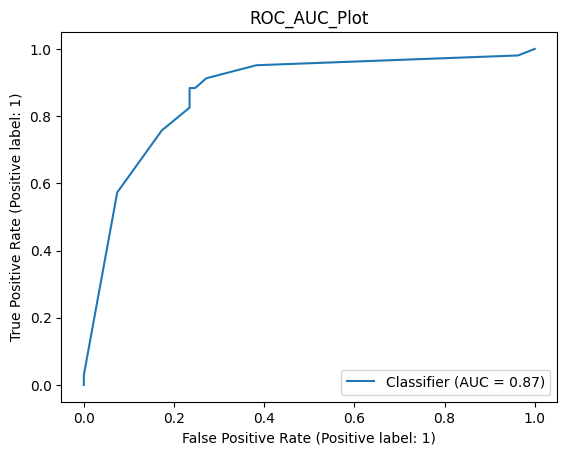

In [56]:
classifier_dt = DecisionTreeClassifier(**para)
model_fitandevaluate(classifier_dt, X_train, y_train, X_test, y_test)

4.Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier


Accuracy :  83.70%
Recall :  86.41%
ROC_AUC Score :  90.67%


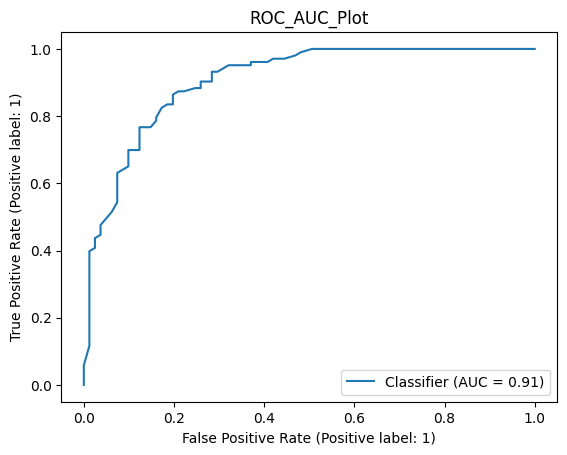

In [58]:
classifier_rf = RandomForestClassifier()
model_fitandevaluate(classifier_rf, X_train, y_train, X_test, y_test)

In [59]:
#reduced after first run for easier next runs
params = {
    'n_estimators': [i for i in range(150, 155, 1)],
    'max_depth': [i for i in range(3,6)],
    'min_samples_split': [3],
    'min_samples_leaf': [1],
}

grid_rf = GridSearchCV(classifier_rf, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [60]:
para = grid_rf.best_params_
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 154}
Best score: 0.9245826337570866


Accuracy :  85.87%
Recall :  90.29%
ROC_AUC Score :  93.11%


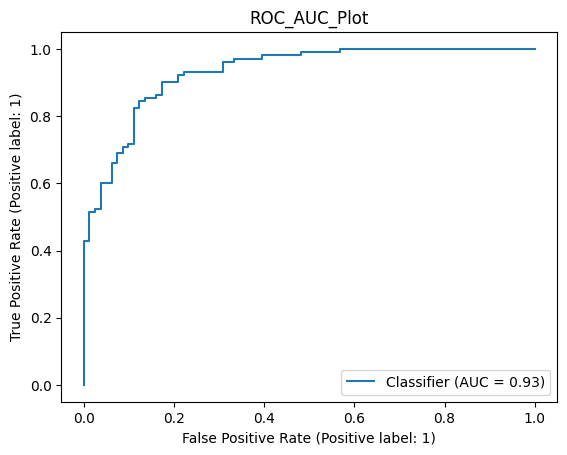

In [61]:
classifier_rf = RandomForestClassifier(**para)
model_fitandevaluate(classifier_rf, X_train, y_train, X_test, y_test)

5.KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy :  81.52%
Recall :  87.38%
ROC_AUC Score :  85.72%


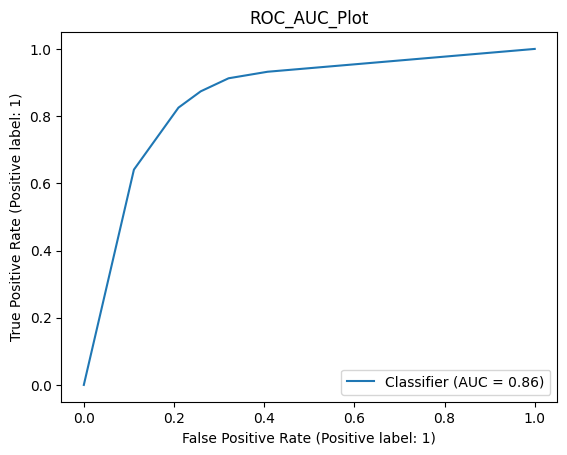

In [63]:
classifier_knn = KNeighborsClassifier()
model_fitandevaluate(classifier_knn, X_train, y_train, X_test, y_test)

In [64]:
params = {
    'p' : [1,2],
    'leaf_size' : [i for i in range(1, 15, 5)],
    'n_neighbors' : [i for i in range(7, 20)],
}

grid_knn = GridSearchCV(classifier_knn, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [65]:
para = grid_knn.best_params_
print('Best parameters:', grid_knn.best_params_)
print('Best score:', grid_knn.best_score_)

Best parameters: {'leaf_size': 1, 'n_neighbors': 15, 'p': 1}
Best score: 0.9105679956437769


Accuracy :  85.33%
Recall :  90.29%
ROC_AUC Score :  89.83%


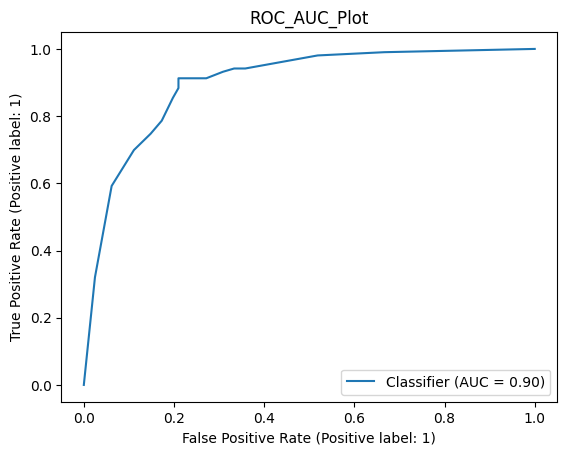

In [66]:
classifier_knn = KNeighborsClassifier(**para)
model_fitandevaluate(classifier_knn, X_train, y_train, X_test, y_test)

6.GradientBoost

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy :  83.70%
Recall :  84.47%
ROC_AUC Score :  92.24%


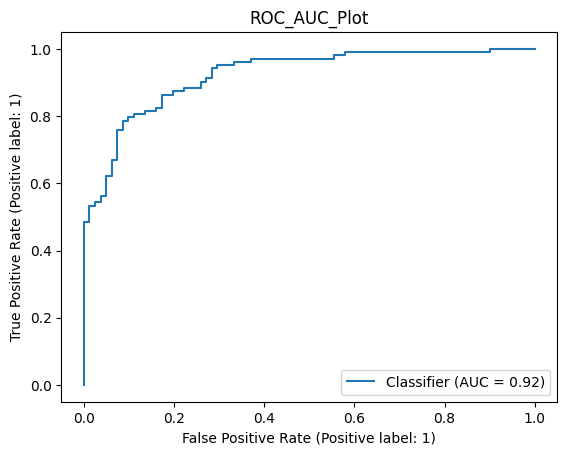

In [69]:
classifier_gb = GradientBoostingClassifier()
model_fitandevaluate(classifier_gb, X_train, y_train, X_test, y_test)

In [70]:
params = {
    'learning_rate' : [ .01, .05, .1],
    'n_estimators' : [10, 30, 60, 100],
    'subsample' : [.2, 0.7, 1],
    'max_depth': [i for i in range(2,7)]
}

grid_gb = GridSearchCV(classifier_gb, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [71]:
para = grid_gb.best_params_
print('Best parameters:', grid_gb.best_params_)
print('Best score:', grid_gb.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0.2}
Best score: 0.9954965211891208


Accuracy :  65.22%
Recall :  99.03%
ROC_AUC Score :  90.42%


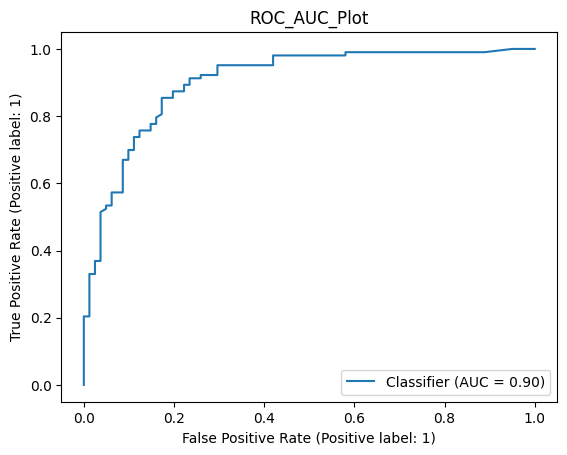

In [72]:
classifier_gb = GradientBoostingClassifier(**para)
model_fitandevaluate(classifier_gb, X_train, y_train, X_test, y_test)

7.Adaboost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

Accuracy :  82.61%
Recall :  83.50%
ROC_AUC Score :  88.89%


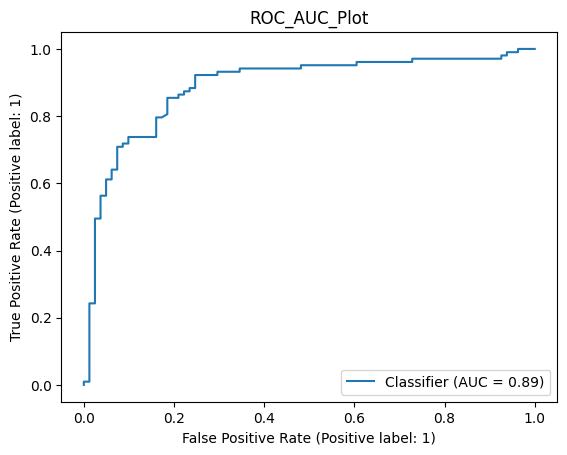

In [74]:
classifier_ab = AdaBoostClassifier()
model_fitandevaluate(classifier_ab, X_train, y_train, X_test, y_test)

In [75]:
params = {
    'n_estimators': [15, 20, 100, 500],
    'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]
}

grid_ab = GridSearchCV(classifier_ab, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [76]:
para = grid_ab.best_params_
print('Best parameters:', grid_ab.best_params_)
print('Best score:', grid_ab.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 20}
Best score: 0.9123374253429738


Accuracy :  84.78%
Recall :  92.23%
ROC_AUC Score :  92.22%


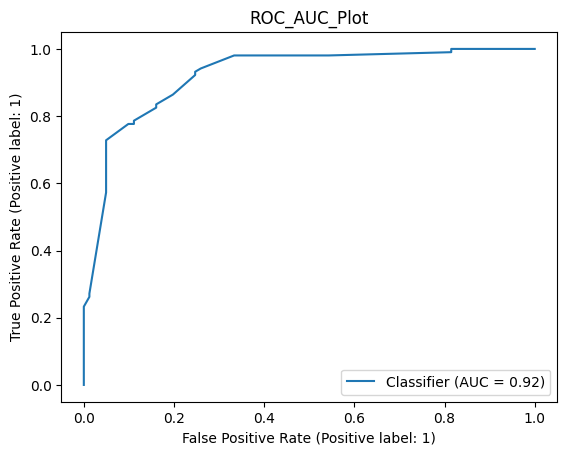

In [77]:
classifier_ab = AdaBoostClassifier(**para)
model_fitandevaluate(classifier_ab, X_train, y_train, X_test, y_test)

8.XGBoost

In [78]:
from xgboost import XGBClassifier

Accuracy :  83.70%
Recall :  82.52%
ROC_AUC Score :  91.62%


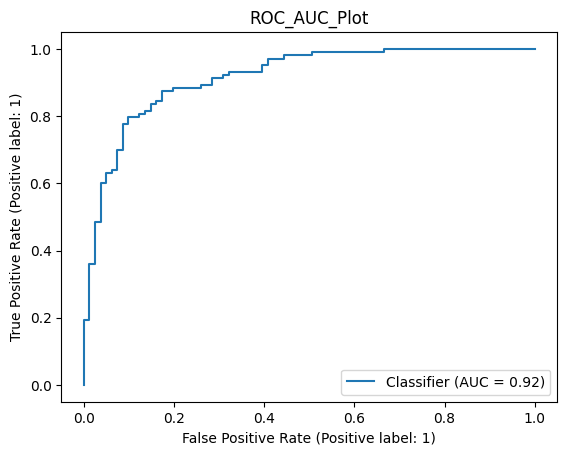

In [79]:
classifier_xg = XGBClassifier()
model_fitandevaluate(classifier_xg, X_train, y_train, X_test, y_test)

In [80]:
params = {"n_estimators":[100, 300],
          "max_depth":[3,5,6],
          "learning_rate": [0.1, 0.3],
          "subsample":[0.5, 1],
          "colsample_bytree":[0.5, 1]}

grid_xg = GridSearchCV(classifier_xg, param_grid=params, cv=kf, scoring='recall').fit(X_train, y_train)

In [81]:
para = grid_xg.best_params_
print('Best parameters:', grid_xg.best_params_)
print('Best score:', grid_xg.best_score_)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best score: 0.9199236042062646


Accuracy :  85.33%
Recall :  88.35%
ROC_AUC Score :  93.34%


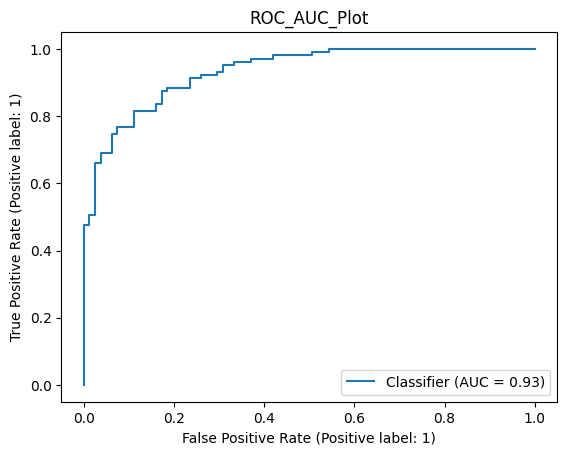

In [82]:
classifier_xg = XGBClassifier(**para)
model_fitandevaluate(classifier_xg, X_train, y_train, X_test, y_test)